<a href="https://colab.research.google.com/github/Santikadwikhansa/UAS-ANALITIKA-DATA_3333210003_SANTIKA-DWI-KHANSA_KELAS-C/blob/main/ANALITIKA_DATA_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

Kodingan ini merupakan impor modul atau pustaka yang diperlukan dalam bahasa pemrograman Python untuk analisis data dan visualisasi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Berikut penjelasan untuk setiap baris kode:
1. 'import pandas as pd': Baris ini mengimpor pustaka pandas dan mengalaminya dengan alias 'pd'. Pandas adalah pustaka yang populer digunakan untuk manipulasi dan analisis data tabular.
2. 'import numpy as np': Baris ini mengimpor pustaka numpy dan mengalaminya dengan alias 'np'. NumPy adalah pustaka yang sering digunakan untuk operasi numerik dan manipulasi array dalam Python.
3. 'import matplotlib.pyplot as plt': Baris ini mengimpor modul 'pyplot' dari pustaka matplotlib dan mengalaminya dengan alias 'plt'. Matplotlib adalah pustaka yang digunakan untuk visualisasi data, dan 'pyplot' adalah submodul yang menyediakan fungsi-fungsi untuk membuat plot.
4. 'import seaborn as sns': Baris ini mengimpor pustaka seaborn dan mengalaminya dengan alias 'sns'. Seaborn adalah pustaka yang dibangun di atas matplotlib dan menyediakan antarmuka yang lebih tinggi untuk membuat plot yang menarik dan informatif.
5. 'import math': Baris ini mengimpor modul 'math' yang merupakan bagian dari pustaka standar Python. Modul ini menyediakan fungsi-fungsi matematika dasar.
6. 'import datetime': Baris ini mengimpor modul 'datetime' yang merupakan bagian dari pustaka standar Python. Modul ini menyediakan fungsi-fungsi untuk bekerja dengan tanggal dan waktu.
7. '%matplotlib inline': Baris ini adalah sebuah magic command yang digunakan dalam lingkungan notebook seperti Jupyter Notebook atau Google Colab. Ini memungkinkan plot yang dihasilkan oleh matplotlib ditampilkan secara langsung di dalam notebook.

**Import Dataset**

Untuk Menginport dataset dari google drive dapat digunakan syntax berikut

Dataset source : https://www.kaggle.com/datasets/anubhavgoyal10/google-stock-prices-since-the-pandemic-started

In [ ]:
# https://drive.google.com/file/d/1tV_28-0uQzJ3_RHLSs8XczCAIhei_QWk/view?usp=sharing

!gdown 1tV_28-0uQzJ3_RHLSs8XczCAIhei_QWk

Downloading...
From: https://drive.google.com/uc?id=1tV_28-0uQzJ3_RHLSs8XczCAIhei_QWk
To: /content/stock_prices.csv
100% 46.3k/46.3k [00:00<00:00, 113MB/s]


In [ ]:
train_data = pd.read_csv('stock_prices.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
1,2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2,2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
3,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
4,2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


Arti dari kodingan tersebut melakukan dua hal:

1. 'train_data = pd.read_csv('stock_prices.csv')': Baris ini menggunakan pustaka pandas (yang telah diimpor sebelumnya dengan alias 'pd') untuk membaca file CSV dengan nama 'stock_prices.csv'. File CSV tersebut berisi data harga saham. Hasil pembacaan file CSV disimpan dalam variabel 'train_data'. Variabel ini akan berisi sebuah objek DataFrame, yang merupakan struktur data tabular yang disediakan oleh pandas.

2. 'train_data.head()': Baris ini memanggil metode '.head()' pada objek DataFrame 'train_data'. Metode '.head()' digunakan untuk menampilkan beberapa baris pertama dari DataFrame. Secara default, metode ini akan menampilkan lima baris pertama. Tujuannya adalah untuk memberikan gambaran awal tentang struktur dan konten data yang telah dibaca.

Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       632 non-null    object 
 1   Open       632 non-null    float64
 2   High       632 non-null    float64
 3   Low        632 non-null    float64
 4   Close      632 non-null    float64
 5   Adj Close  632 non-null    float64
 6   Volume     632 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ KB


Kodingan ini digunakan untuk mendapatkan informasi tentang struktur dan karakteristik dari objek DataFrame 'train_data'. Metode '.info()' adalah salah satu metode yang disediakan oleh pustaka pandas untuk menganalisis dataset.

Check statistic vales for every features

In [ ]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,632.000000,632.000000,632.000000,632.000000,632.000000,6.320000e+02
mean,108.337674,109.602440,107.137917,108.382393,108.382393,3.051286e+07
std,27.507147,27.593982,27.290470,27.418889,27.418889,1.326435e+07
min,52.825500,53.566002,50.676800,52.831001,52.831001,6.936000e+06
25%,81.543747,82.662062,80.789373,81.714624,81.714624,2.179800e+07
50%,113.152752,114.783001,112.029625,113.216503,113.216503,2.754000e+07
75%,133.636879,135.621746,132.479744,133.902122,133.902122,3.492650e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


Kodingan 'train_data.describe()' digunakan untuk menghasilkan ringkasan statistik tentang objek DataFrame 'train_data'. Metode '.describe()' adalah salah satu metode yang disediakan oleh pustaka pandas untuk menganalisis dataset.
Melalui 'train_data.describe()', kita dapat melihat ringkasan statistik penting tentang dataset, seperti jumlah, rata-rata, standar deviasi, minimum, maksimum, serta kuartil-kuartil dari setiap kolom numerik dalam objek DataFrame 'train_data'. Informasi ini berguna dalam pemahaman lebih lanjut tentang distribusi dan karakteristik data yang ada.

Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


Kodingan tersebut melakukan beberapa manipulasi pada objek DataFrame 'train_data' yang berisi data harga saham. Berikut adalah penjelasan untuk setiap baris kode:
1. train_data['Date'] = pd.to_datetime(train_data['Date']): Baris ini menggunakan pustaka pandas untuk mengubah kolom 'Date' dalam DataFrame train_data menjadi tipe data datetime. Fungsi pd.to_datetime() digunakan untuk mengonversi nilai-nilai dalam kolom 'Date' menjadi objek datetime yang dapat digunakan untuk memanipulasi data tanggal dan waktu.
2. train_data.set_index('Date', inplace=True): Baris ini menggunakan metode set_index() dari objek DataFrame train_data untuk mengatur kolom 'Date' sebagai indeks DataFrame. Dengan menggunakan 'Date' sebagai indeks, kita dapat dengan mudah mengakses dan memanipulasi data berdasarkan tanggal.
3. train_data.head(): Baris ini memanggil metode .head() pada objek DataFrame train_data. Metode ini digunakan untuk menampilkan beberapa baris pertama dari DataFrame yang telah mengalami perubahan dengan pengaturan indeks. Tujuannya adalah untuk memberikan gambaran awal tentang struktur dan konten data yang telah dimodifikasi.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

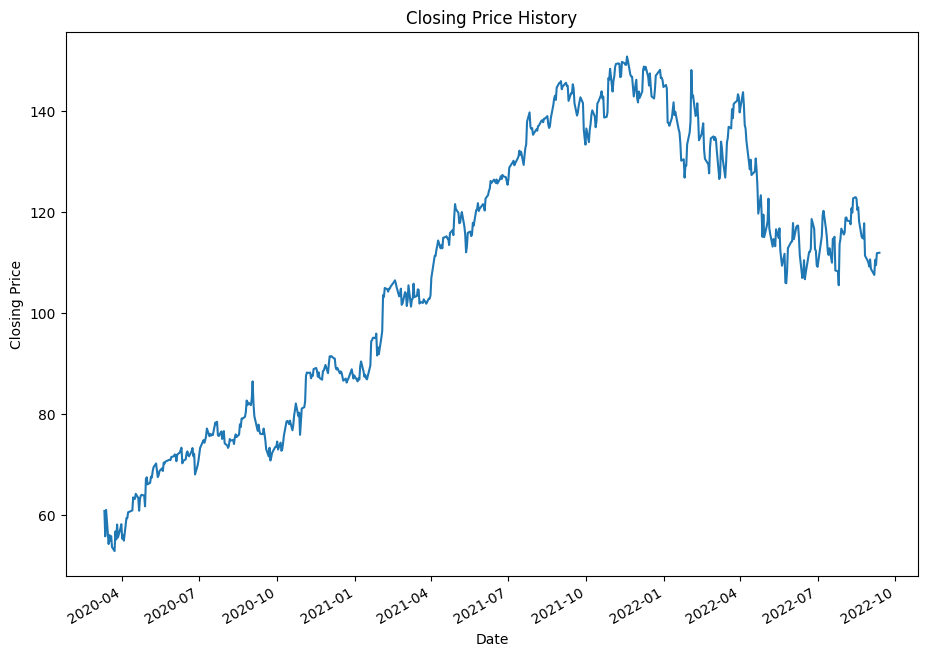

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Kodingan tersebut digunakan untuk membuat plot harga penutupan (closing price) dari data saham menggunakan pustaka matplotlib. Berikut adalah penjelasan untuk setiap baris kode:
1. plt.figure(figsize=(11, 8)): Baris ini digunakan untuk membuat objek gambar (figure) dengan ukuran 11x8 inci. Fungsi figure() dari pustaka matplotlib digunakan untuk membuat gambar kosong yang akan digunakan untuk menampilkan plot.
2. train_data['Adj Close'].plot(): Baris ini memanggil metode plot() pada kolom 'Adj Close' dalam objek DataFrame train_data. Metode plot() digunakan untuk membuat plot garis dari data yang dipilih. Dalam hal ini, plot akan dibuat berdasarkan nilai kolom 'Adj Close', yang mungkin mewakili harga penutupan yang telah diadjust atau disesuaikan.
3. plt.title('Closing Price History'): Baris ini menambahkan judul (title) pada plot yang dibuat. Judul ini diberi label "Closing Price History" yang menjelaskan isi dari plot tersebut.
4. plt.xlabel('Date'): Baris ini menambahkan label sumbu x pada plot, dengan label "Date". Ini memberikan informasi tentang data tanggal pada sumbu x.
5. plt.ylabel('Closing Price'): Baris ini menambahkan label sumbu y pada plot, dengan label "Closing Price". Ini memberikan informasi tentang data harga penutupan pada sumbu y.
6. plt.show(): Baris ini digunakan untuk menampilkan plot yang telah dibuat. Fungsi show() dari pustaka matplotlib digunakan untuk menampilkan plot ke layar.

Dengan menjalankan kodingan di atas, kita akan mendapatkan plot garis yang menunjukkan pergerakan harga penutupan dari data saham. Plot tersebut akan memiliki judul, label sumbu x dan sumbu y yang informatif untuk memahami konten plot.

<Figure size 1600x800 with 0 Axes>

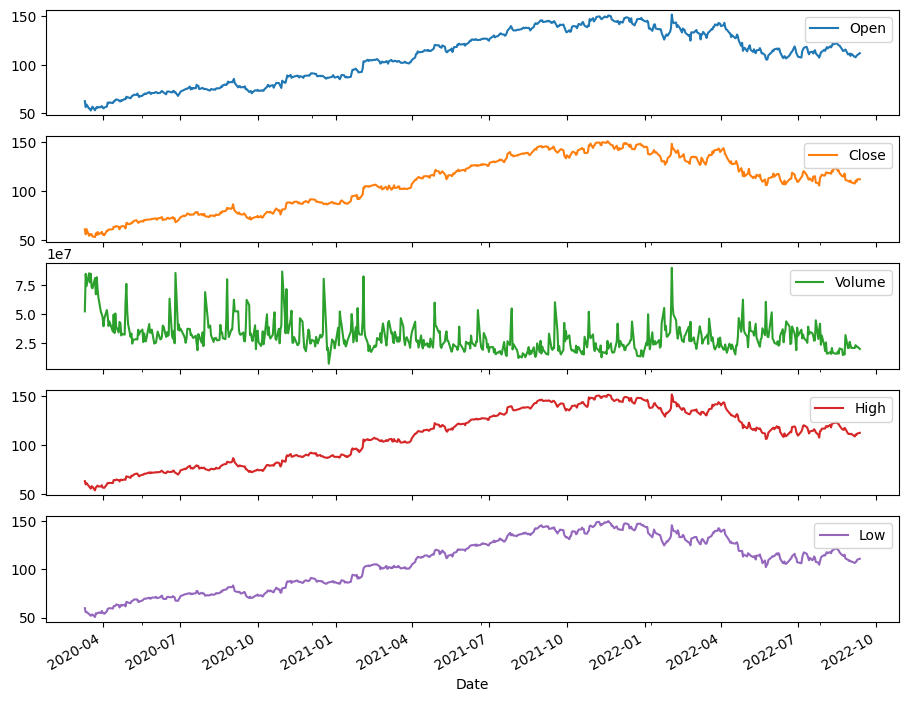

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Kodingan tersebut digunakan untuk membuat subplot atau subgrafik yang menampilkan beberapa kolom spesifik dari objek DataFrame train_data menggunakan pustaka matplotlib. Berikut adalah penjelasan untuk setiap baris kode:
1. plt.figure(figsize=(16, 8)): Baris ini digunakan untuk membuat objek gambar (figure) dengan ukuran 16x8 inci. Fungsi figure() dari pustaka matplotlib digunakan untuk membuat gambar kosong yang akan digunakan untuk menampilkan subplot.
2. cols = ['Open', 'Close', 'Volume', 'High', 'Low']: Baris ini mendefinisikan sebuah list cols yang berisi nama-nama kolom yang ingin ditampilkan dalam subplot. Dalam hal ini, kita memilih kolom 'Open', 'Close', 'Volume', 'High', dan 'Low' dari DataFrame train_data.
3. axes = train_data[cols].plot(figsize=(11, 9), subplots=True): Baris ini memanggil metode plot() pada kolom-kolom yang terdapat dalam list cols dari objek DataFrame train_data. Metode plot() digunakan untuk membuat subplot berdasarkan kolom-kolom yang dipilih. Argument figsize=(11, 9) digunakan untuk mengatur ukuran subplot yang akan ditampilkan. Argument subplots=True mengindikasikan bahwa kita ingin membuat subplot terpisah untuk setiap kolom yang dipilih.
4. plt.show(): Baris ini digunakan untuk menampilkan subplot yang telah dibuat. Fungsi show() dari pustaka matplotlib digunakan untuk menampilkan subplot ke layar.

Dengan menjalankan kodingan di atas, kita akan mendapatkan subplot yang menampilkan grafik terpisah untuk setiap kolom 'Open', 'Close', 'Volume', 'High', dan 'Low' dari objek DataFrame train_data. Subplot-subplot ini akan ditampilkan dengan ukuran yang telah ditentukan (11x9 inci) melalui argument figsize pada plot().

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Kodingan tersebut melakukan manipulasi pada objek DataFrame train_data dengan menambahkan dua kolom baru, yaitu 'HL_PCT' dan 'PCT_change'. Berikut adalah penjelasan untuk setiap baris kode:

1. train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0: Baris ini menghitung persentase perubahan antara harga tertinggi (High) dan harga terendah (Low) dalam sehari. Formula (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 digunakan untuk menghitung perubahan persentase dan hasilnya disimpan dalam kolom baru 'HL_PCT'. Perhitungan ini memberikan indikasi tentang volatilitas atau fluktuasi harga saham dalam satu hari perdagangan.
2. train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0: Baris ini menghitung persentase perubahan antara harga penutupan (Close) dan harga pembukaan (Open). Formula (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 digunakan untuk menghitung perubahan persentase dan hasilnya disimpan dalam kolom baru 'PCT_change'. Perhitungan ini memberikan indikasi tentang perubahan harga saham dari pembukaan hingga penutupan dalam satu hari perdagangan.

Dengan melakukan manipulasi di atas, DataFrame train_data telah ditambahkan dua kolom baru, 'HL_PCT' dan 'PCT_change', yang memberikan informasi tambahan tentang volatilitas dan perubahan harga saham. Kolom 'HL_PCT' mengindikasikan persentase perubahan antara harga tertinggi dan terendah, sementara kolom 'PCT_change' mengindikasikan persentase perubahan antara harga penutupan dan pembukaan.


In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Kodingan tersebut membuat sebuah objek DataFrame baru dengan nama df yang berisi kolom-kolom yang dipilih dari objek DataFrame train_data. Berikut adalah penjelasan untuk kodingan tersebut:

1. train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]: Baris ini mengakses kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari objek DataFrame train_data. Dengan menggunakan tanda kurung ganda [['HL_PCT', 'PCT_change', 'Adj Close','Volume']], kita dapat memilih beberapa kolom sekaligus.
2. df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]: Baris ini menugaskan hasil seleksi kolom tersebut ke dalam objek DataFrame baru yang disebut df. Dengan demikian, df akan berisi kolom-kolom yang telah dipilih dari train_data.

Dengan menjalankan kodingan di atas, kita akan mendapatkan objek DataFrame baru df yang hanya berisi kolom-kolom 'HL_PCT', 'PCT_change', 'Adj Close', dan 'Volume' dari train_data. DataFrame baru ini berguna jika kita ingin fokus pada kolom-kolom tersebut untuk analisis lebih lanjut atau visualisasi data.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

32


<ipython-input-12-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Kodingan tersebut melakukan dua hal:

1. Menghitung nilai forecast_out sebagai 5% dari panjang dataset df dan membulatkannya ke atas dengan menggunakan fungsi math.ceil(). Nilai ini akan digunakan sebagai jumlah periode yang akan digunakan untuk memprediksi nilai di masa depan.
2. Membuat kolom baru dalam DataFrame df yang disebut 'label'. Kolom ini akan berisi nilai 'Adj Close' yang di-shift ke atas sebanyak forecast_out periode. Dalam konteks ini, bergesernya nilai 'Adj Close' ke atas sebanyak forecast_out periode berarti memindahkan nilai-nilai tersebut ke baris-baris yang lebih awal dalam kolom 'label'.

Dengan menggunakan pendekatan ini, kita dapat menggunakan kolom 'label' sebagai target atau label dalam suatu model prediksi. Nilai-nilai dalam kolom 'label' mewakili nilai 'Adj Close' yang dipindahkan ke periode yang lebih awal, yang dapat digunakan untuk melatih model prediksi dan memprediksi nilai 'Adj Close' di masa depan.

Selain itu, nilai forecast_out juga dicetak (di-print) untuk menunjukkan jumlah periode yang digunakan untuk memprediksi nilai di masa depan.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Kodingan tersebut mengimport beberapa modul dari pustaka scikit-learn (sklearn) yang akan digunakan dalam analisis dan pemodelan data. Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.preprocessing import StandardScaler: Baris ini mengimport kelas StandardScaler dari modul preprocessing dalam pustaka sklearn. StandardScaler digunakan untuk melakukan penskalaan fitur dengan menghilangkan mean dan menyetarakan varians fitur-fitur pada dataset.
2. from sklearn.linear_model import LinearRegression, Ridge: Baris ini mengimport kelas LinearRegression dan Ridge dari modul linear_model dalam pustaka sklearn. LinearRegression adalah kelas yang digunakan untuk membangun model regresi linier, sementara Ridge adalah kelas yang digunakan untuk membangun model regresi ridge.
3. from sklearn.ensemble import RandomForestRegressor: Baris ini mengimport kelas RandomForestRegressor dari modul ensemble dalam pustaka sklearn. RandomForestRegressor adalah kelas yang digunakan untuk membangun model regresi dengan menggunakan metode Random Forest.
4. from sklearn.svm import SVR: Baris ini mengimport kelas SVR dari modul svm dalam pustaka sklearn. SVR adalah kelas yang digunakan untuk membangun model regresi dengan menggunakan metode Support Vector Regression.
5. from sklearn.model_selection import train_test_split: Baris ini mengimport fungsi train_test_split dari modul model_selection dalam pustaka sklearn. train_test_split digunakan untuk membagi dataset menjadi subset pelatihan (training set) dan subset pengujian (test set) untuk melakukan validasi model.
6. from sklearn.metrics import mean_squared_log_error: Baris ini mengimport fungsi mean_squared_log_error dari modul metrics dalam pustaka sklearn. mean_squared_log_error digunakan untuk mengukur kesalahan atau perbedaan antara nilai aktual dan nilai yang diprediksi menggunakan skala logaritmik.

Dengan mengimport modul-modul tersebut, kita dapat menggunakan fungsionalitas yang disediakan oleh scikit-learn untuk melakukan preprocessing, membangun model regresi, membagi dataset, dan mengukur performa model dengan metrik tertentu.



It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-14-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Kodingan tersebut melakukan proses penskalaan data menggunakan objek StandardScaler dari pustaka scikit-learn (sklearn). Berikut adalah penjelasan untuk setiap baris kode:

1. scaler = StandardScaler(): Baris ini membuat objek StandardScaler yang akan digunakan untuk melakukan penskalaan data. StandardScaler akan menghilangkan mean dan menyetarakan varians data.
2. X = np.array(df.drop(['label'], 1)): Baris ini mengambil semua kolom dari DataFrame df kecuali kolom 'label' dengan menggunakan metode drop(). Hasilnya disimpan dalam variabel X sebagai array numpy. Kolom 'label' dihilangkan karena biasanya menjadi target atau label dalam pemodelan.
3. scaler.fit(X): Baris ini menggunakan metode fit() dari objek StandardScaler untuk menghitung mean dan varians dari data yang akan digunakan sebagai acuan dalam penskalaan.
4. X = scaler.transform(X): Baris ini menggunakan metode transform() dari objek StandardScaler untuk melakukan penskalaan data. Data dalam X diubah menggunakan mean dan varians yang telah dihitung sebelumnya. Setelah proses ini, data dalam X akan memiliki mean 0 dan varians 1, sesuai dengan proses penskalaan yang dilakukan oleh StandardScaler.

Dengan menjalankan kodingan di atas, kita akan mendapatkan data X yang telah di-transformasikan dengan menggunakan StandardScaler. Data tersebut telah disesuaikan dengan mean dan varians yang dihitung dari data asli. Hal ini berguna dalam banyak metode pemodelan yang mengharuskan data memiliki skala yang serupa agar tidak mempengaruhi hasil analisis.






In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Kodingan tersebut membagi data X menjadi dua subset, yaitu X_Predictions dan X. Berikut adalah penjelasan untuk setiap baris kode:

1. X_Predictions = X[-forecast_out:]: Baris ini mengambil forecast_out baris terakhir dari data X dan menyimpannya dalam variabel X_Predictions. Baris-baris ini akan digunakan sebagai data yang akan diprediksi oleh model.
2. X = X[:-forecast_out]: Baris ini mengambil semua baris dari data X kecuali forecast_out baris terakhir, dan menyimpannya kembali ke variabel X. Baris-baris ini akan digunakan sebagai data yang akan dilatih oleh model.

Dengan melakukan pemisahan seperti ini, X_Predictions berisi forecast_out baris terakhir dari data X yang akan digunakan untuk melakukan prediksi menggunakan model yang akan dibangun. Sedangkan X berisi semua baris kecuali forecast_out baris terakhir, yang akan digunakan sebagai data pelatihan untuk membangun model. Hal ini memungkinkan kita untuk memisahkan data yang akan diprediksi dengan data pelatihan sehingga dapat memeriksa performa model dengan menggunakan data yang belum pernah dilihat sebelumnya.






In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-16-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Kodingan tersebut melakukan dua hal terkait DataFrame df. Berikut adalah penjelasan untuk setiap baris kode:

1. df.dropna(inplace=True): Baris ini menghapus baris-baris yang mengandung nilai-nilai NaN (missing values) dari DataFrame df. Penggunaan argumen inplace=True menyebabkan perubahan ini diterapkan langsung pada DataFrame df tanpa perlu menugaskan hasilnya ke variabel baru.
2. y = np.array(df['label']): Baris ini mengambil kolom 'label' dari DataFrame df dan menyimpannya sebagai array numpy dalam variabel y. Kolom 'label' biasanya berisi nilai target atau label yang akan diprediksi dalam suatu model.

Dengan menjalankan kodingan di atas, baris-baris yang mengandung nilai-nilai NaN dihapus dari DataFrame df, dan kolom 'label' dari DataFrame yang telah dibersihkan tersebut disimpan dalam variabel y sebagai array numpy. Tindakan ini mempersiapkan data untuk melanjutkan proses pemodelan, di mana X digunakan sebagai fitur-fitur yang akan dilatih dan y digunakan sebagai target atau label yang akan diprediksi oleh model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kodingan tersebut menggunakan fungsi train_test_split dari pustaka scikit-learn (sklearn) untuk membagi data menjadi subset pelatihan (training set) dan subset pengujian (test set). Berikut adalah penjelasan untuk kode:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Baris ini memanggil fungsi train_test_split untuk membagi data X dan y menjadi subset pelatihan dan pengujian. Argumen X dan y adalah data yang akan dibagi. Argumen test_size=0.2 menentukan bahwa ukuran subset pengujian akan menjadi 20% dari keseluruhan data, sementara subset pelatihan akan menjadi 80% dari keseluruhan data. Argumen random_state=42 digunakan untuk mengatur keadaan acak (random state) agar pembagian data dapat direproduksi dengan hasil yang konsisten.

Hasil dari pemanggilan fungsi ini adalah empat variabel: X_train, X_test, y_train, dan y_test. Variabel X_train berisi subset pelatihan untuk fitur-fitur, X_test berisi subset pengujian untuk fitur-fitur, y_train berisi subset pelatihan untuk target/label, dan y_test berisi subset pengujian untuk target/label.

Dengan menggunakan pemisahan ini, kita dapat menggunakan X_train dan y_train untuk melatih model dan X_test dan y_test untuk menguji performa model pada data yang belum pernah dilihat sebelumnya.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Kodingan tersebut menggunakan kelas LinearRegression dari pustaka scikit-learn (sklearn) untuk membangun model regresi linear dan mengukur performanya. Berikut adalah penjelasan untuk setiap baris kode:

1. lr = LinearRegression(): Baris ini membuat objek LinearRegression yang akan digunakan untuk membangun model regresi linear.
2. lr.fit(X_train, y_train): Baris ini menggunakan metode fit() dari objek LinearRegression untuk melatih model dengan menggunakan subset pelatihan X_train dan y_train. Model akan belajar dari hubungan antara fitur-fitur dalam X_train dan target/label dalam y_train.
3. lr_confidence = lr.score(X_test, y_test): Baris ini menggunakan metode score() dari objek LinearRegression untuk mengukur performa model pada subset pengujian X_test dan y_test. Metode score() menghitung koefisien determinasi (R-squared) dari model, yang merupakan ukuran sejauh mana model dapat menjelaskan variasi dalam data pengujian. Nilai koefisien determinasi berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan performa model yang lebih baik.

Dengan menjalankan kodingan di atas, model regresi linear (lr) dibangun dengan menggunakan subset pelatihan, dan performanya diukur dengan menghitung koefisien determinasi (lr_confidence) pada subset pengujian. Koefisien determinasi ini dapat digunakan untuk mengevaluasi sejauh mana model dapat memprediksi nilai target/label dengan akurat berdasarkan fitur-fitur yang diberikan.

In [ ]:
lr_confidence

0.9121009590572984

Kodingan tersebut menghasilkan variabel lr_confidence, yang merupakan hasil pengukuran performa model regresi linear menggunakan koefisien determinasi (R-squared). Nilai lr_confidence mengindikasikan sejauh mana model mampu menjelaskan variasi dalam data pengujian.
Dengan mengevaluasi nilai lr_confidence, kita dapat memperoleh gambaran tentang seberapa baik model regresi linear yang dibangun dapat memprediksi nilai target/label berdasarkan fitur-fitur yang diberikan.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Kodingan tersebut menggunakan kelas RandomForestRegressor dari pustaka scikit-learn (sklearn) untuk membangun model regresi acak (random forest) dan mengukur performanya. Berikut adalah penjelasan untuk setiap baris kode:

1. rf = RandomForestRegressor(): Baris ini membuat objek RandomForestRegressor yang akan digunakan untuk membangun model regresi acak.
2. rf.fit(X_train, y_train): Baris ini menggunakan metode fit() dari objek RandomForestRegressor untuk melatih model dengan menggunakan subset pelatihan X_train dan y_train. Model akan belajar dari hubungan antara fitur-fitur dalam X_train dan target/label dalam y_train.
3. rf_confidence = rf.score(X_test, y_test): Baris ini menggunakan metode score() dari objek RandomForestRegressor untuk mengukur performa model pada subset pengujian X_test dan y_test. Metode score() menghitung koefisien determinasi (R-squared) dari model, yang merupakan ukuran sejauh mana model dapat menjelaskan variasi dalam data pengujian. Nilai koefisien determinasi berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan performa model yang lebih baik.

Dengan menjalankan kodingan di atas, model regresi acak (rf) dibangun dengan menggunakan subset pelatihan, dan performanya diukur dengan menghitung koefisien determinasi (rf_confidence) pada subset pengujian. Koefisien determinasi ini dapat digunakan untuk mengevaluasi sejauh mana model dapat memprediksi nilai target/label dengan akurat berdasarkan fitur-fitur yang diberikan.


In [ ]:
rf_confidence

0.9321780930128677

Kodingan tersebut menghasilkan variabel rf_confidence, yang merupakan hasil pengukuran performa model regresi acak (random forest) menggunakan koefisien determinasi (R-squared). Nilai rf_confidence mengindikasikan sejauh mana model mampu menjelaskan variasi dalam data pengujian.
Dengan mengevaluasi nilai rf_confidence, kita dapat memperoleh gambaran tentang seberapa baik model regresi acak yang dibangun dapat memprediksi nilai target/label berdasarkan fitur-fitur yang diberikan.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-22-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-22-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Kodingan tersebut berisi langkah-langkah untuk melakukan prediksi menggunakan model regresi acak (random forest) dan menyimpan hasil prediksi ke dalam DataFrame df. Berikut adalah penjelasan untuk setiap baris kode:

1. last_date = df.index[-1]: Baris ini mengambil tanggal terakhir dalam indeks DataFrame df dan menyimpannya dalam variabel last_date. Ini digunakan untuk mendapatkan tanggal terakhir dalam dataset yang akan digunakan sebagai titik awal untuk memprediksi data di masa depan.
2. last_unix = last_date.timestamp(): Baris ini mengubah last_date menjadi waktu dalam detik dengan menggunakan metode timestamp(). Ini akan memberikan nilai waktu dalam detik sejak epoch (1 Januari 1970).
3. one_day = 86400: Baris ini menetapkan nilai one_day sebagai jumlah detik dalam satu hari, yaitu 86400 detik.
4. next_unix = last_unix + one_day: Baris ini menghitung waktu dalam detik untuk hari berikutnya dengan menambahkan one_day ke last_unix. Ini akan digunakan untuk memprediksi nilai pada hari berikutnya.
5. forecast_set = rf.predict(X_Predictions): Baris ini menggunakan model regresi acak (rf) yang telah dilatih sebelumnya untuk memprediksi data di masa depan. Data yang akan diprediksi disimpan dalam variabel X_Predictions. Hasil prediksi disimpan dalam variabel forecast_set.
6. df['Forecast'] = np.nan: Baris ini menambahkan kolom baru bernama 'Forecast' ke DataFrame df dan menginisialisasinya dengan nilai NaN (not a number).
7. for i in forecast_set:: Baris ini memulai loop untuk setiap nilai dalam forecast_set, yang berisi hasil prediksi dari model untuk data di masa depan.
8. next_date = datetime.datetime.fromtimestamp(next_unix): Baris ini mengubah nilai next_unix menjadi format tanggal dan waktu menggunakan fungsi datetime.datetime.fromtimestamp(). Ini menghasilkan next_date yang merupakan tanggal berikutnya dalam urutan prediksi.
9. next_unix += 86400: Baris ini menambahkan one_day (86400 detik) ke next_unix, sehingga next_unix akan mewakili waktu dalam detik untuk hari berikutnya.
10. df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]: Baris ini menambahkan baris baru ke DataFrame df dengan indeks next_date dan nilai-nilai NaN untuk semua kolom kecuali kolom 'Forecast'. Nilai i (hasil prediksi untuk hari berikutnya) ditambahkan ke kolom 'Forecast' pada baris yang sesuai.

Dengan menjalankan kodingan di atas, prediksi menggunakan model regresi acak dilakukan untuk data di masa depan, dan hasil prediksi disimpan dalam kolom 'Forecast' pada DataFrame df. Loop tersebut berulang untuk setiap hasil prediksi, sehingga DataFrame df akan berisi prediksi untuk setiap tanggal di masa depan.

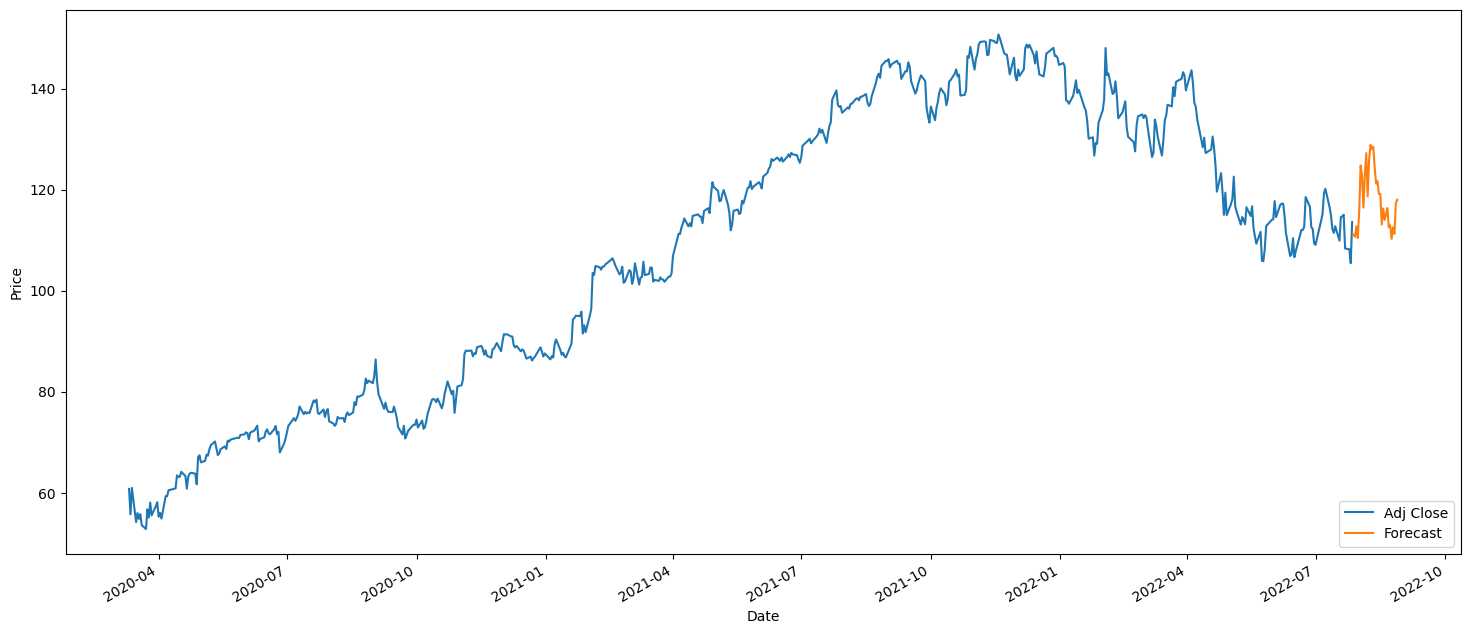

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Kodingan ini digunakan untuk membuat plot visualisasi dari data aktual (Adj Close) dan prediksi (Forecast) menggunakan pustaka matplotlib. Berikut adalah penjelasan untuk setiap baris kode:

1. plt.figure(figsize=(18, 8)): Baris ini membuat objek gambar dengan ukuran 18x8 inci (lebar x tinggi) untuk menyesuaikan ukuran plot.
2. df['Adj Close'].plot(): Baris ini memplot data aktual (Adj Close) dari DataFrame df menggunakan metode plot(). Ini akan menghasilkan plot garis yang menunjukkan perubahan harga seiring waktu.
3. df['Forecast'].plot(): Baris ini memplot data prediksi (Forecast) dari DataFrame df menggunakan metode plot(). Ini akan menghasilkan plot garis yang menunjukkan prediksi harga di masa depan.
4. plt.legend(loc=4): Baris ini menambahkan legenda ke plot untuk membedakan antara data aktual dan prediksi. Lokasi legenda ditentukan oleh angka 4, yang menunjukkan posisi legenda di sudut kanan bawah plot.
5. plt.xlabel('Date'): Baris ini menambahkan label sumbu x pada plot dengan teks "Date". Label ini mengidentifikasi sumbu x sebagai tanggal.
6. plt.ylabel('Price'): Baris ini menambahkan label sumbu y pada plot dengan teks "Price". Label ini mengidentifikasi sumbu y sebagai harga.
7. plt.show(): Baris ini menampilkan plot yang telah dibuat.

Dengan menjalankan kodingan di atas, plot akan menampilkan grafik garis yang membandingkan data aktual (Adj Close) dengan prediksi (Forecast). Hal ini membantu dalam memvisualisasikan sejauh mana model prediksi cocok dengan data aktual dan memberikan gambaran tentang bagaimana pergerakan harga diharapkan di masa depan.

## Clustering

<ipython-input-23-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


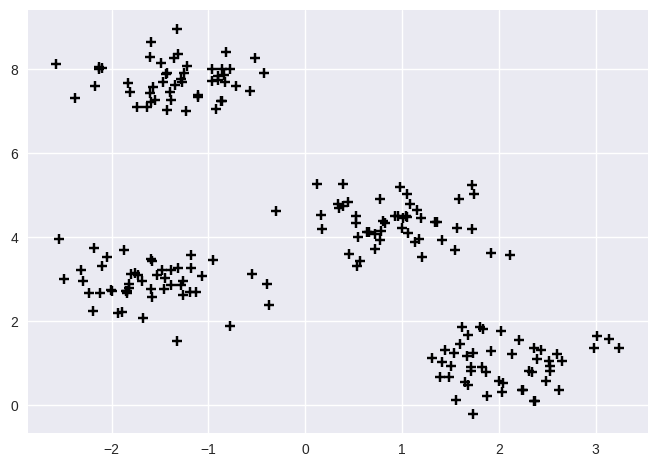

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


Kodingan ini mengimport pustaka matplotlib.pyplot dan fungsi make_blobs dari sklearn.datasets. Berikut adalah penjelasan untuk setiap baris kode:

1. import matplotlib.pyplot as plt: Baris ini mengimport modul pyplot dari pustaka matplotlib dan memberikan alias plt agar lebih mudah digunakan.
2. from sklearn.datasets import make_blobs: Baris ini mengimport fungsi make_blobs dari modul datasets dalam pustaka sklearn (scikit-learn). Fungsi ini digunakan untuk menghasilkan data titik-titik yang terkelompok dalam beberapa cluster.
3. plt.style.use('seaborn'): Baris ini mengatur gaya plot menjadi gaya seaborn, yang memberikan tampilan yang lebih menarik dan estetis.
4. x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0): Baris ini menggunakan fungsi make_blobs untuk menghasilkan dataset sintetis. Argumen-argumen dalam fungsi ini menentukan jumlah sampel (n_samples), jumlah fitur (n_features), jumlah pusat cluster (centers), standar deviasi cluster (cluster_std), dan lain-lain. Hasilnya disimpan dalam variabel x untuk fitur dan y untuk label atau cluster yang sesuai.
5. plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50): Baris ini menggunakan fungsi scatter untuk membuat plot scatter dari data x. x[:, 0] dan x[:, 1] digunakan untuk mengambil nilai fitur pertama dan kedua dari setiap sampel. Argumen-argumen lainnya menentukan pengaturan plot, seperti warna (c), tanda (marker), dan ukuran (s).
6. plt.show(): Baris ini menampilkan plot yang telah dibuat.

Dengan menjalankan kodingan di atas, kita akan mendapatkan plot scatter dari data titik-titik yang terkelompok dalam beberapa cluster. Setiap cluster ditandai dengan warna dan tanda yang berbeda. Ini membantu dalam memvisualisasikan bagaimana data terbagi menjadi kelompok-kelompok berdasarkan fitur-fiturnya.

In [ ]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

Hasil kodingan yang diberikan merupakan representasi dari sebuah array dengan elemen-elemen yang terlihat seperti angka-angka. Array ini memiliki 200 elemen dalam satu dimensi. Setiap elemen dalam array menunjukkan klasifikasi atau label dari suatu data atau sampel.
Dalam kasus ini, elemen-elemen dalam array tersebut mungkin merujuk pada klasifikasi atau label yang diberikan pada suatu dataset. Namun, tanpa informasi tambahan, tidak dapat ditentukan secara pasti apa arti sebenarnya dari setiap elemen dalam konteks dataset yang spesifik.



**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

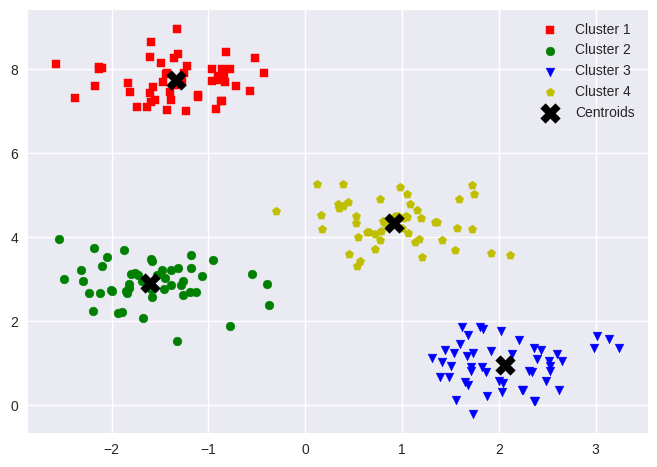

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


Kodingan ini menggunakan algoritma K-Means clustering dari pustaka scikit-learn untuk mengelompokkan data ke dalam beberapa cluster dan memvisualisasikan hasilnya menggunakan scatter plot. Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.cluster import KMeans: Baris ini mengimport kelas KMeans dari modul cluster dalam pustaka sklearn (scikit-learn). Kelas ini digunakan untuk melakukan clustering menggunakan algoritma K-Means.
2. km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0): Baris ini membuat objek KMeans dengan beberapa parameter. Parameter-parameter tersebut adalah:
- n_clusters=4: Menentukan jumlah cluster yang diinginkan.
init='random': Menentukan metode inisialisasi pusat cluster, dalam hal ini menggunakan inisialisasi acak.
- n_init=10: Menentukan jumlah kali inisialisasi acak yang akan dilakukan dan akan memilih hasil terbaik berdasarkan inersia (inertia).
- max_iter=300: Menentukan jumlah iterasi maksimum yang akan dilakukan oleh algoritma K-Means.
- tol=1e-04: Menentukan toleransi perubahan inersia yang menunjukkan kapan iterasi akan berhenti.
- random_state=0: Menentukan seed atau nilai awal untuk menghasilkan hasil yang konsisten secara acak.
3. y_km = km.fit_predict(x): Baris ini memanggil metode fit_predict pada objek KMeans (km) dengan menggunakan data x. Metode ini akan menghitung cluster centers dan memprediksi label cluster untuk setiap sampel.
4. plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1'): Baris ini menggunakan fungsi scatter untuk memplot data yang termasuk dalam Cluster 1. Data tersebut diambil dari x dengan menggunakan indeks y_km==0. Argumen-argumen lainnya menentukan pengaturan plot seperti ukuran (s), warna (c), dan tanda (marker).
5. Baris ke-5 hingga ke-8 mirip dengan baris ke-4, namun digunakan untuk memplot data dari Cluster 2, Cluster 3, dan Cluster 4 dengan label yang sesuai.
6. plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, marker='X', c='k', label='Centroids'): Baris ini memplot pusat-pusat cluster yang dihitung oleh algoritma K-Means. Pusat-pusat cluster ini diambil dari atribut cluster_centers_ pada objek KMeans. Argumen-argumen lainnya menentukan pengaturan plot seperti ukuran (s), tanda (marker), warna (c), dan label.
7. plt.legend(scatterpoints=1): Baris ini menambahkan legenda ke plot. Argumen scatterpoints=1 menentukan jumlah tanda yang akan muncul dalam legenda untuk setiap label cluster.
8. plt.show(): Baris ini menampilkan plot yang telah dibuat.

**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

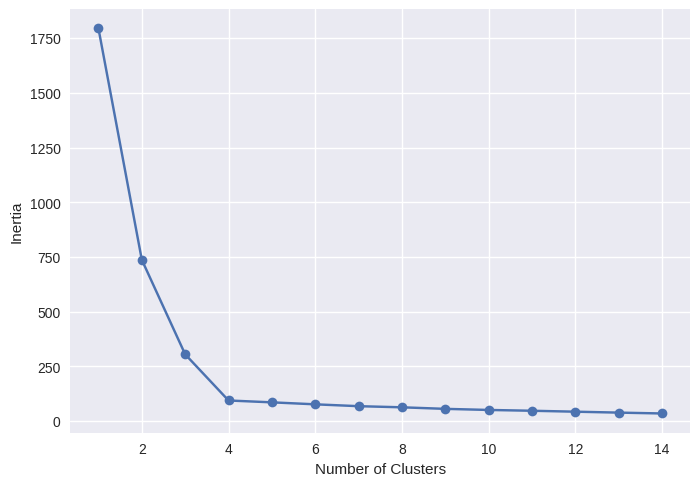

In [ ]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Kodingan ini bertujuan untuk memplot grafik elbow untuk menentukan jumlah optimal dari cluster dalam algoritma K-Means. Berikut adalah penjelasan untuk setiap baris kode:

1. inertias = []: Baris ini membuat sebuah list kosong dengan nama inertias. List ini akan digunakan untuk menyimpan nilai inersia dari setiap iterasi clustering.
2. for i in range(1, 15): Baris ini melakukan iterasi dari 1 hingga 14 (jumlah maksimum cluster yang ingin dievaluasi).
3. km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0): Baris ini membuat objek KMeans dengan jumlah cluster yang berubah pada setiap iterasi (mulai dari 1 hingga 14). Parameter lainnya tetap sama seperti sebelumnya.
4. km.fit(x): Baris ini melakukan fitting atau pelatihan algoritma K-Means menggunakan data x.
5. inertias.append(km.inertia_): Baris ini menambahkan nilai inersia dari clustering yang dilakukan ke dalam list inertias.
6. plt.plot(range(1,15), inertias, marker='o'): Baris ini memplot grafik elbow. Rentang cluster (1 hingga 14) digunakan sebagai sumbu x, sedangkan nilai inersia yang disimpan dalam list inertias digunakan sebagai sumbu y. Setiap titik plot ditandai dengan marker 'o'.
7. plt.xlabel('Number of Clusters'): Baris ini memberikan label pada sumbu x dengan teks "Number of Clusters".
8. plt.ylabel('Inertia'): Baris ini memberikan label pada sumbu y dengan teks "Inertia".
9. plt.show(): Baris ini menampilkan plot grafik elbow yang telah dibuat.

Grafik elbow digunakan untuk memvisualisasikan hubungan antara jumlah cluster dengan nilai inersia. Tujuan dari grafik ini adalah untuk mencari titik di mana penurunan inersia tidak signifikan lagi saat jumlah cluster bertambah. Pada grafik elbow, kita mencari siku (elbow) yang mengindikasikan jumlah cluster yang optimal.

Another example for KMeans

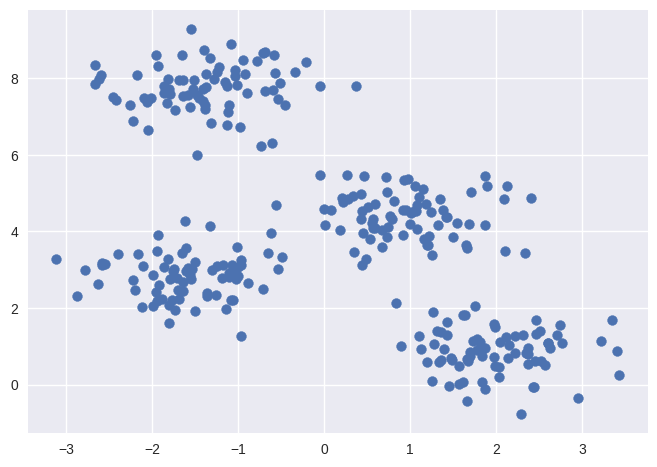

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Kodingan ini menggunakan fungsi make_blobs dari modul datasets dalam pustaka sklearn untuk membuat data sintetis dalam bentuk blob dengan jumlah cluster yang telah ditentukan. Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.datasets import make_blobs: Baris ini mengimport fungsi make_blobs dari modul datasets dalam pustaka sklearn (scikit-learn). Fungsi ini digunakan untuk membuat data sintetis dalam bentuk blob.
2. X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0): Baris ini menggunakan fungsi make_blobs untuk membuat data sintetis. Argumen-argumen yang digunakan adalah:
- n_samples=300: Menentukan jumlah total sampel yang akan dibuat.
- centers=4: Menentukan jumlah cluster yang akan dibentuk.
- cluster_std=0.60: Menentukan standar deviasi dari masing-masing cluster.
- random_state=0: Menentukan seed atau nilai awal untuk menghasilkan hasil yang konsisten secara acak.
Fungsi make_blobs mengembalikan dua nilai:
- X: Array 2D yang berisi koordinat titik-titik dalam ruang fitur.
- y_true: Array 1D yang berisi label asli untuk setiap titik.
3. plt.scatter(X[:, 0], X[:, 1], s=50): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk memplot data yang telah dibuat. Koordinat X diambil dari kolom pertama (X[:, 0]), sedangkan koordinat Y diambil dari kolom kedua (X[:, 1]). Argumen s=50 menentukan ukuran titik pada plot.

Dengan demikian, kodingan tersebut menghasilkan sebuah scatter plot yang menampilkan data sintetis dalam bentuk blob dengan jumlah cluster yang ditentukan. Setiap cluster direpresentasikan dengan titik-titik pada plot.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Kodingan ini menggunakan algoritma K-Means dari modul cluster dalam pustaka sklearn untuk melakukan clustering pada data X. Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.cluster import KMeans: Baris ini mengimport kelas KMeans dari modul cluster dalam pustaka sklearn (scikit-learn). Kelas KMeans digunakan untuk melakukan clustering menggunakan algoritma K-Means.
2. kmeans = KMeans(n_clusters=4): Baris ini membuat objek kmeans dari kelas KMeans dengan jumlah cluster yang ditentukan sebagai 4. Parameter n_clusters digunakan untuk menentukan jumlah cluster yang akan dibentuk dalam proses clustering.
3. kmeans.fit(X): Baris ini melakukan proses fitting atau pelatihan algoritma K-Means menggunakan data X. Fungsi fit digunakan untuk melatih model K-Means dengan data input X. Model akan mempelajari pola dan menentukan posisi pusat cluster (centroid) berdasarkan data yang diberikan.

Dengan demikian, kodingan tersebut melakukan clustering pada data X menggunakan algoritma K-Means dengan 4 cluster. Setelah proses pelatihan, model K-Means akan menghasilkan pusat-pusat cluster yang akan digunakan untuk mengelompokkan data yang belum diketahui labelnya ke dalam salah satu dari 4 cluster tersebut.

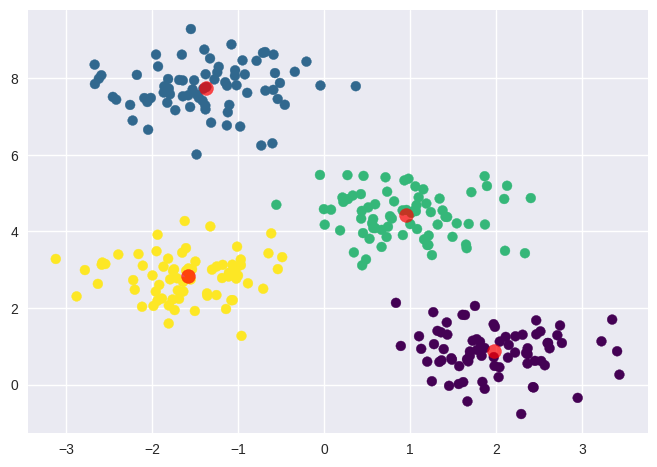

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

Kodingan ini digunakan untuk memvisualisasikan hasil dari proses clustering menggunakan algoritma K-Means. Berikut adalah penjelasan untuk setiap baris kode:

1. y_kmeans = kmeans.predict(X): Baris ini menggunakan metode predict pada objek kmeans untuk memprediksi label cluster untuk setiap data dalam X. Hasil prediksi ini disimpan dalam variabel y_kmeans.
2. plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis'): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk memplot data X. Argumen c=y_kmeans digunakan untuk memberikan warna berdasarkan label cluster yang telah diprediksi. Argumen s=50 menentukan ukuran titik pada plot. Argumen cmap='viridis' mengatur skema warna yang digunakan.
3. pusat = kmeans.cluster_centers_: Baris ini mengambil pusat-pusat cluster yang telah ditemukan oleh model K-Means dan menyimpannya dalam variabel pusat.
4. plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7): Baris ini menggunakan fungsi scatter untuk memplot pusat-pusat cluster yang telah ditemukan. Argumen c='red' mengatur warna titik-titik pusat cluster menjadi merah. Argumen s=100 menentukan ukuran titik pada plot. Argumen alpha=0.7 mengatur tingkat transparansi pada titik-titik pusat cluster.

Dengan demikian, kodingan tersebut menghasilkan scatter plot yang menampilkan data X dengan pewarnaan berdasarkan label cluster yang diprediksi oleh model K-Means. Pusat-pusat cluster juga ditandai dengan titik merah.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

Kodingan ini mengimport kelas KMeans dari modul cluster dalam pustaka sklearn (scikit-learn) dan membuat objek kmeans dengan jumlah cluster yang ditentukan sebagai 6.
KMeans adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam sejumlah cluster yang telah ditentukan sebelumnya. Dalam kodingan ini, n_clusters=6 digunakan untuk menentukan jumlah cluster yang akan dibentuk oleh algoritma K-Means.
Setelah objek kmeans dibuat, kita dapat menggunakan objek ini untuk melatih model K-Means menggunakan data yang ada dan kemudian melakukan prediksi pada data yang belum diketahui labelnya.






In [ ]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Kodingan tersebut menghitung nilai inersia untuk setiap jumlah cluster yang berbeda dalam rentang 1 hingga 9 menggunakan algoritma K-Means
Berikut adalah penjelasan untuk setiap baris kode:

1. inertia = []: Baris ini membuat sebuah list kosong dengan nama inertia untuk menyimpan nilai inersia yang dihitung.
2. for i in range(1,10): Baris ini memulai loop yang akan berjalan untuk setiap nilai i dalam rentang 1 hingga 9. Rentang ini menentukan jumlah cluster yang akan digunakan dalam algoritma K-Means.
3. kmeans = KMeans(n_clusters=i): Baris ini membuat objek kmeans dari kelas KMeans dengan jumlah cluster yang ditentukan sebagai i.
4. kmeans.fit(X): Baris ini melatih model K-Means menggunakan data X. Fungsi fit digunakan untuk melatih model K-Means dengan data input X.
5. inertia.append(kmeans.inertia_): Baris ini menambahkan nilai inersia yang dihitung oleh model K-Means ke dalam list inertia.

Setelah loop selesai, list inertia akan berisi nilai inersia untuk setiap jumlah cluster yang telah diuji. Inersia merupakan metrik yang digunakan untuk mengevaluasi kualitas clustering dalam algoritma K-Means, di mana nilai inersia lebih kecil menunjukkan bahwa data dalam setiap cluster lebih kompak.

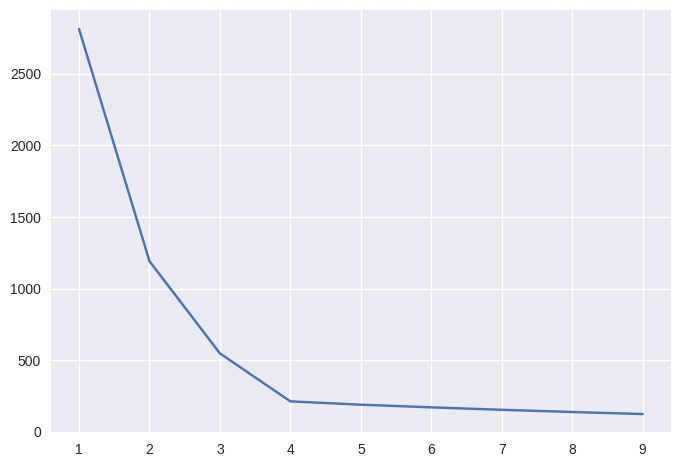

In [ ]:
plt.plot(range(1,10),inersia)
plt.show()

Kodingan tersebut digunakan untuk membuat sebuah plot yang menampilkan nilai inersia pada sumbu y terhadap jumlah cluster pada sumbu x.
Berikut adalah penjelasan untuk setiap baris kode:

1. plt.plot(range(1,10), inersia): Baris ini menggunakan fungsi plot dari modul pyplot dalam pustaka matplotlib untuk membuat plot. Argumen pertama range(1,10) menentukan nilai pada sumbu x, yaitu rentang 1 hingga 9 (jumlah cluster). Argumen kedua inertia adalah nilai inersia yang telah dihitung sebelumnya.
2. plt.show(): Baris ini menampilkan plot yang telah dibuat.

Dengan kodingan ini, kita dapat melihat bagaimana nilai inersia berubah seiring dengan peningkatan jumlah cluster yang digunakan dalam algoritma K-Means. Plot ini berguna untuk membantu memilih jumlah cluster yang optimal, di mana penurunan inersia tidak signifikan setelah jumlah cluster tertentu.

KMean6 with 6 cluster

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Kodingan tersebut mengimport fungsi make_moons dari modul datasets dalam pustaka sklearn (scikit-learn) dan menggunakan fungsi tersebut untuk membuat dataset sintetis dengan pola "moons" (bulan).
Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.datasets import make_moons: Baris ini mengimport fungsi make_moons yang digunakan untuk membuat dataset sintetis dengan pola "moons".
2. X, y = make_moons(200, noise=.05, random_state=0): Baris ini memanggil fungsi make_moons dengan tiga argumen. Argumen pertama adalah 200, yang menentukan jumlah sampel yang akan dihasilkan dalam dataset. Argumen kedua adalah noise=.05, yang mengindikasikan tingkat kebisingan yang akan ditambahkan ke dataset. Argumen ketiga adalah random_state=0, yang menentukan nilai seed untuk menghasilkan dataset yang dapat direproduksi.

Setelah kodingan ini dijalankan, variabel X akan berisi array yang menunjukkan koordinat titik-titik pada pola "moons", dan variabel y akan berisi array yang menunjukkan label kelas dari setiap titik (0 atau 1).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


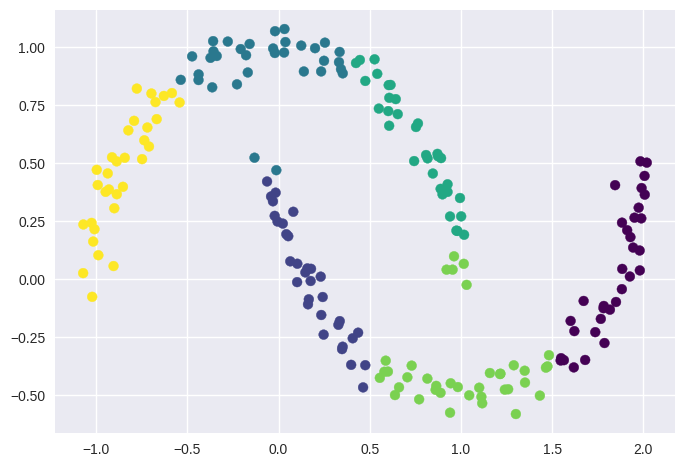

In [ ]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

Kodingan tersebut menggunakan algoritma K-Means untuk melakukan clustering pada dataset X yang telah dibuat sebelumnya menggunakan fungsi make_moons. Setelah melakukan clustering, kodingan tersebut menampilkan scatter plot dari dataset dengan pewarnaan berdasarkan hasil clustering.
Berikut adalah penjelasan untuk setiap baris kode:

1. label = KMeans(6, random_state=0).fit_predict(X): Baris ini menggunakan algoritma K-Means untuk melakukan clustering pada dataset X. Parameter pertama 6 menunjukkan jumlah cluster yang diinginkan. Parameter kedua random_state=0 digunakan untuk mengatur seed agar hasil clustering dapat direproduksi. Metode fit_predict(X) digunakan untuk melatih model K-Means dengan data X dan mengembalikan label kluster untuk setiap sampel dalam bentuk array.
2. plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis'): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk membuat scatter plot dari dataset. Argumen pertama X[:, 0] dan X[:, 1] menunjukkan koordinat x dan y dari setiap titik dalam dataset. Argumen kedua c=label digunakan untuk mewarnai setiap titik berdasarkan label kluster yang telah ditentukan sebelumnya. Argumen ketiga s=50 menentukan ukuran titik pada plot. Argumen keempat cmap='viridis' menentukan skema warna yang akan digunakan pada plot.

Dengan kodingan ini, kita dapat melihat hasil clustering pada dataset dengan menampilkan scatter plot yang mewakili setiap titik dengan warna yang sesuai dengan kluster yang diberikan oleh algoritma K-Means.

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


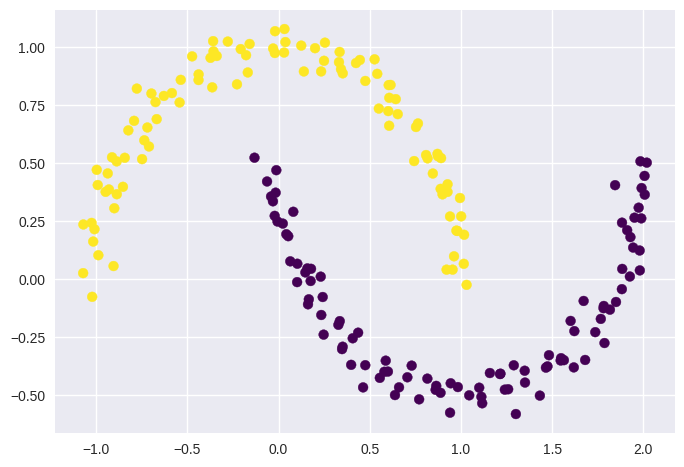

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Kodingan ini menggunakan algoritma Spectral Clustering untuk melakukan clustering pada dataset X yang telah dibuat menggunakan fungsi make_moons. Setelah melakukan clustering, kodingan tersebut menampilkan scatter plot dari dataset dengan pewarnaan berdasarkan hasil clustering.
Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.cluster import SpectralClustering: Baris ini mengimport kelas SpectralClustering dari modul cluster dalam pustaka sklearn (scikit-learn). Kelas ini digunakan untuk menerapkan algoritma Spectral Clustering.
2. model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans'): Baris ini membuat objek model dari kelas SpectralClustering. Parameter n_clusters=2 menunjukkan jumlah cluster yang diinginkan. Parameter affinity='nearest_neighbors' menentukan metode pengukuran jarak antara titik-titik dalam ruang fitur. Parameter assign_labels='kmeans' menunjukkan bahwa label kluster akan ditentukan menggunakan algoritma K-Means setelah representasi graf spektral dihitung.
3. labels = model.fit_predict(X): Baris ini menggunakan metode fit_predict(X) untuk melatih model Spectral Clustering dengan data X dan mengembalikan label kluster untuk setiap sampel dalam bentuk array.
4. plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk membuat scatter plot dari dataset. Argumen pertama X[:, 0] dan X[:, 1] menunjukkan koordinat x dan y dari setiap titik dalam dataset. Argumen kedua c=labels digunakan untuk mewarnai setiap titik berdasarkan label kluster yang telah ditentukan sebelumnya. Argumen ketiga s=50 menentukan ukuran titik pada plot. Argumen keempat cmap='viridis' menentukan skema warna yang akan digunakan pada plot.

Dengan kodingan ini, kita dapat melihat hasil clustering pada dataset dengan menampilkan scatter plot yang mewakili setiap titik dengan warna yang sesuai dengan kluster yang diberikan oleh algoritma Spectral Clustering.

**DBScan**

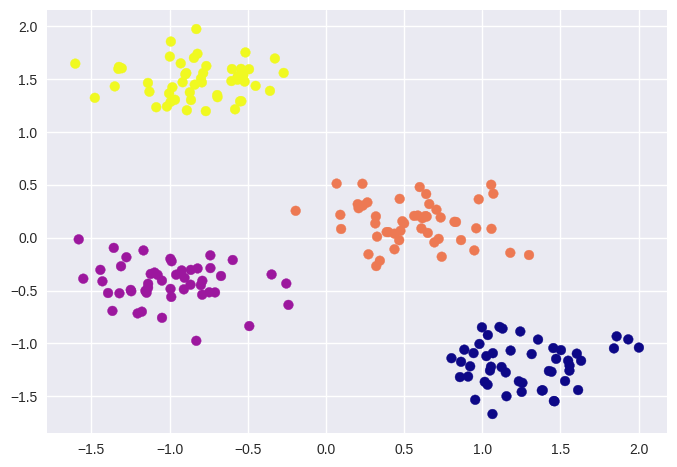

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


Kodingan ini menggunakan algoritma DBSCAN (Density-Based Spatial Clustering of Applications with Noise) untuk melakukan clustering pada dataset x. Terlebih dahulu, data x diubah skala menggunakan objek StandardScaler dari modul preprocessing dalam pustaka sklearn. Setelah itu, algoritma DBSCAN diterapkan pada data yang telah diubah skala.
Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.cluster import DBSCAN: Baris ini mengimport kelas DBSCAN dari modul cluster dalam pustaka sklearn. Kelas ini digunakan untuk menerapkan algoritma DBSCAN.
2. from sklearn.preprocessing import StandardScaler: Baris ini mengimport kelas StandardScaler dari modul preprocessing dalam pustaka sklearn. Kelas ini digunakan untuk melakukan normalisasi data dengan mengubah skala data agar memiliki rata-rata nol dan standar deviasi satu.
3. scaler = StandardScaler(): Baris ini membuat objek scaler dari kelas StandardScaler.
4. newX = scaler.fit_transform(x): Baris ini menggunakan metode fit_transform dari objek scaler untuk mengubah skala data x menggunakan rata-rata dan standar deviasi dari data itu sendiri.
5. dbscan = DBSCAN(eps=0.35, min_samples=3): Baris ini membuat objek dbscan dari kelas DBSCAN. Parameter eps=0.35 menentukan jarak maksimum antara dua titik agar dapat dikategorikan ke dalam satu kluster. Parameter min_samples=3 menentukan jumlah minimum titik yang harus ada dalam radius eps agar dianggap sebagai inti (core) dalam kluster.
6. y_db = dbscan.fit_predict(newX): Baris ini menggunakan metode fit_predict dari objek dbscan untuk melatih model DBSCAN dengan data newX dan mengembalikan label kluster untuk setiap sampel dalam bentuk array.
7. plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma'): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk membuat scatter plot dari data newX. Argumen pertama newX[:,0] dan newX[:,1] menunjukkan koordinat x dan y dari setiap titik dalam dataset yang telah diubah skala. Argumen kedua c=y_db digunakan untuk mewarnai setiap titik berdasarkan label kluster yang telah ditentukan oleh algoritma DBSCAN. Argumen ketiga cmap='plasma' menentukan skema warna yang akan digunakan pada plot.
8. plt.show(): Baris ini menampilkan plot hasil clustering menggunakan DBSCAN.

Dengan kodingan ini, kita dapat melihat hasil clustering pada dataset dengan menampilkan scatter plot yang mewakili setiap titik dengan warna yang sesuai dengan kluster yang diberikan oleh algoritma DBSCAN setelah data diubah skala menggunakan StandardScaler.

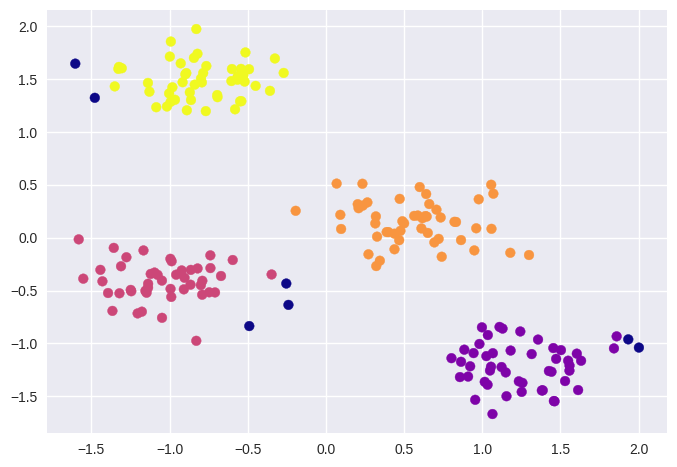

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


Kodingan ini memiliki fungsi yang serupa dengan kodingan sebelumnya. Perbedaan utamanya terletak pada nilai parameter min_samples yang digunakan dalam objek DBSCAN.
Berikut adalah penjelasan untuk setiap baris kode:

1. from sklearn.cluster import DBSCAN: Baris ini mengimport kelas DBSCAN dari modul cluster dalam pustaka sklearn. Kelas ini digunakan untuk menerapkan algoritma DBSCAN.
2. from sklearn.preprocessing import StandardScaler: Baris ini mengimport kelas StandardScaler dari modul preprocessing dalam pustaka sklearn. Kelas ini digunakan untuk melakukan normalisasi data dengan mengubah skala data agar memiliki rata-rata nol dan standar deviasi satu.
3. scaler = StandardScaler(): Baris ini membuat objek scaler dari kelas StandardScaler.
4. newX = scaler.fit_transform(x): Baris ini menggunakan metode fit_transform dari objek scaler untuk mengubah skala data x menggunakan rata-rata dan standar deviasi dari data itu sendiri.
5. dbscan = DBSCAN(eps=0.35, min_samples=10): Baris ini membuat objek dbscan dari kelas DBSCAN. Parameter eps=0.35 menentukan jarak maksimum antara dua titik agar dapat dikategorikan ke dalam satu kluster. Parameter min_samples=10 menentukan jumlah minimum titik yang harus ada dalam radius eps agar dianggap sebagai inti (core) dalam kluster.
6. y_db = dbscan.fit_predict(newX): Baris ini menggunakan metode fit_predict dari objek dbscan untuk melatih model DBSCAN dengan data newX dan mengembalikan label kluster untuk setiap sampel dalam bentuk array.
7. plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma'): Baris ini menggunakan fungsi scatter dari modul pyplot dalam pustaka matplotlib untuk membuat scatter plot dari data newX. Argumen pertama newX[:,0] dan newX[:,1] menunjukkan koordinat x dan y dari setiap titik dalam dataset yang telah diubah skala. Argumen kedua c=y_db digunakan untuk mewarnai setiap titik berdasarkan label kluster yang telah ditentukan oleh algoritma DBSCAN. Argumen ketiga cmap='plasma' menentukan skema warna yang akan digunakan pada plot.
8. plt.show(): Baris ini menampilkan plot hasil clustering menggunakan DBSCAN.

Dengan kodingan ini, kita dapat melihat hasil clustering pada dataset dengan menampilkan scatter plot yang mewakili setiap titik dengan warna yang sesuai dengan kluster yang diberikan oleh algoritma DBSCAN setelah data diubah skala menggunakan StandardScaler. Nilai parameter min_samples=10 menentukan jumlah minimum titik yang harus ada dalam radius eps agar dianggap sebagai inti (core) dalam kluster.